## A Guided Exploration of UN Data (Gross Domestic Product and Internet Usage)
1. Create a `data` folder in your local project repository.  
2. Download these two CSV files and place them in the data folder:

    a.	Gross Domestic Product (GDP) per capita http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD **DO NOT APPLY ANY FILTERS**
     - rename the file to `gdp_percapita.csv`
     - open it with a text editor (**not excel**) and take a look

    b.	Percentage of Individuals using the Internet http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H  **DO NOT APPLY ANY FILTERS**
     - rename the file to `internet_use.csv`
     - open it with a text editor (**not excel**) and take a look

2.	Create a `notebooks` folder and launch a Jupyter Notebook in this folder. Give it a meaningful name.  
 - **IMPORTANT:**  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
  - Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from `Code` to `Markdown`.

3. Import the required packages with their customary aliases as follows:

    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [3]:
gdp_df.info

<bound method DataFrame.info of      Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2021  1517.016266              NaN
1        Afghanistan  2020  1968.341002              NaN
2        Afghanistan  2019  2079.921861              NaN
3        Afghanistan  2018  2060.698973              NaN
4        Afghanistan  2017  2096.093111              NaN
...              ...   ...          ...              ...
7657        Zimbabwe  1994  2670.106615              NaN
7658        Zimbabwe  1993  2458.783255              NaN
7659        Zimbabwe  1992  2468.278257              NaN
7660        Zimbabwe  1991  2781.787843              NaN
7661        Zimbabwe  1990  2704.757299              NaN

[7662 rows x 4 columns]>

In [4]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

Answer: 7662 rows, 4 columns,
        data types:
        Country or Area     object
        Year                 int64
        Value              float64
        Value Footnotes    float64

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
gdp_df = gdp_df.drop('Value Footnotes', axis=1)
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [6]:
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country','Value':'GDP_Per_Capita'})
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [7]:
gdp_df.isna().any()

Country           False
Year              False
GDP_Per_Capita    False
dtype: bool

In [8]:
gdp_df.groupby("Country").count()

,Year,GDP_Per_Capita
Country,,
Afghanistan,20,20
Africa Eastern and Southern,33,33
Africa Western and Central,33,33
Albania,33,33
Algeria,33,33
...,...,...
Viet Nam,33,33
West Bank and Gaza,29,29
World,33,33


In [9]:
gdp_df_count = gdp_df.groupby("Country").count().sort_values("Year")
gdp_df_count

,Year,GDP_Per_Capita
Country,,
Djibouti,10,10
Somalia,10,10
Turks and Caicos Islands,12,12
Sint Maarten (Dutch part),14,14
Kosovo,15,15
...,...,...
Jamaica,33,33
Japan,33,33
Jordan,33,33


In [10]:
gdp_df_count[gdp_df_count["Year"] < 33]

,Year,GDP_Per_Capita
Country,,
Djibouti,10,10
Somalia,10,10
Turks and Caicos Islands,12,12
Sint Maarten (Dutch part),14,14
Kosovo,15,15
Cayman Islands,16,16
Nauru,19,19
Afghanistan,20,20
CuraÃ§ao,22,22


In [11]:
gdp_df_count[gdp_df_count["Year"] < 33].count()

Year              40
GDP_Per_Capita    40
dtype: int64

In [12]:
gdp_df_count[gdp_df_count["Year"] < 24].count()

Year              15
GDP_Per_Capita    15
dtype: int64

In [13]:
gdp_df.groupby("Year").count()

,Country,GDP_Per_Capita
Year,,
1990,207,207
1991,208,208
1992,210,210
1993,211,211
1994,213,213
1995,223,223
1996,223,223
1997,226,226
1998,226,226


Answer: There are 242 countries total and 33 years total. There are 40 countries with less than 33 years and 15 countries with less than 24 years. The number of observations per year increases over time until it plateaus 2014-2020 and decreases the following years.

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

<Axes: >

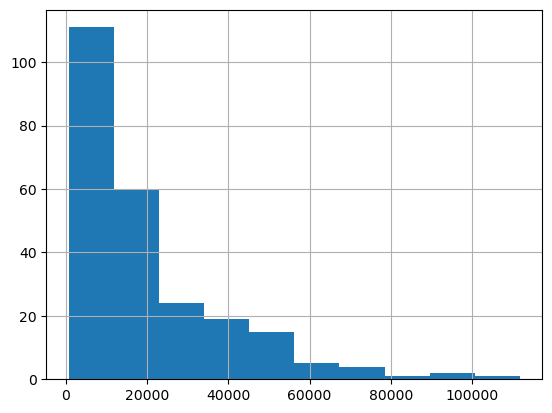

In [14]:
gdp_df[gdp_df["Year"] == 2020]["GDP_Per_Capita"].hist()

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

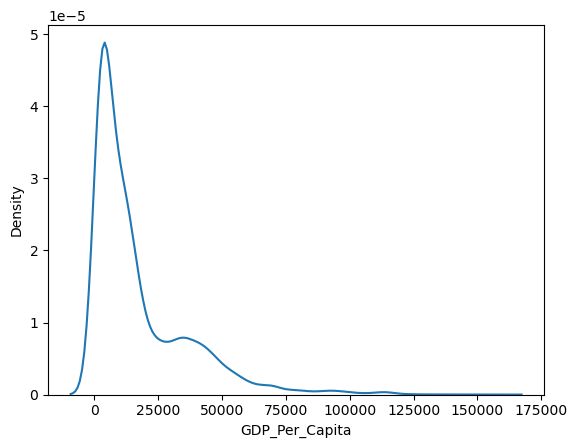

In [15]:
sns.kdeplot(gdp_df["GDP_Per_Capita"])

<Axes: ylabel='GDP_Per_Capita'>

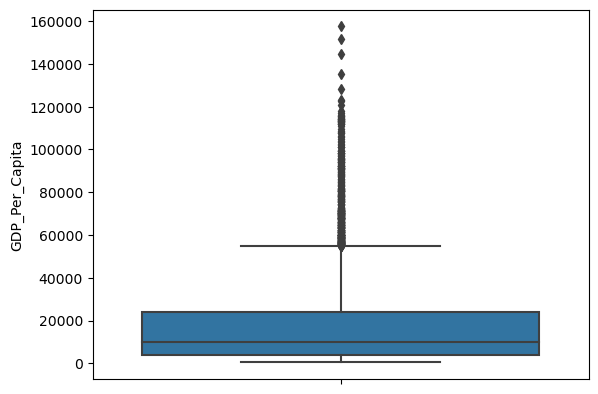

In [16]:
df_year_2020_box = gdp_df.loc[gdp_df["Year"]==2020]

sns.boxplot(y=gdp_df["GDP_Per_Capita"])

<Axes: ylabel='GDP_Per_Capita'>

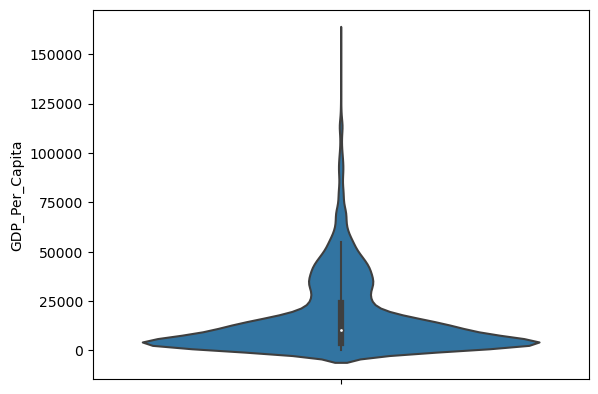

In [17]:
sns.violinplot(y=gdp_df["GDP_Per_Capita"])

Answer: Each visual gives us an idea of how the GDP is distributed. The boxplot gives us quartile and median information.

9. What was the median GDP per capita value in 2020?

In [18]:
gdp_df[gdp_df["Year"]==2020]["GDP_Per_Capita"].median()

13357.997573370474

Answer: 13357.997573370474

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  

In [19]:
gdp_decades = gdp_df.loc[(gdp_df["Year"]==1990)|(gdp_df["Year"]==2000)|(gdp_df["Year"]==2010)|(gdp_df["Year"]==2020)]

gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

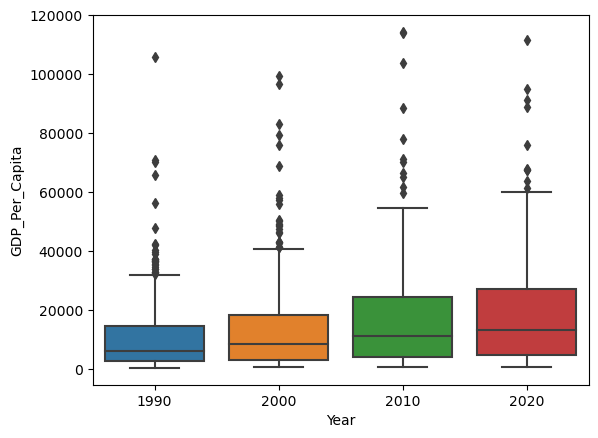

In [20]:
sns.boxplot(x=gdp_decades["Year"],y=gdp_decades["GDP_Per_Capita"])

<BarContainer object of 921 artists>

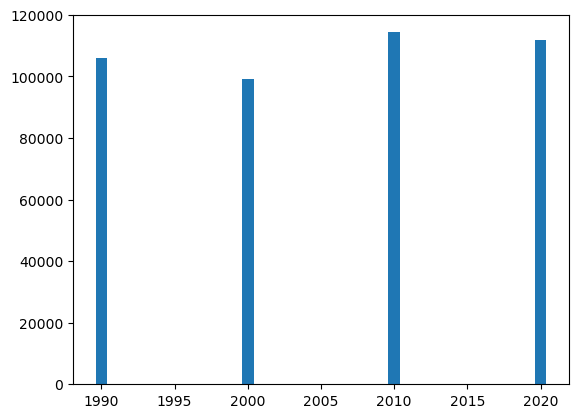

In [21]:
plt.bar(gdp_decades["Year"],gdp_decades["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

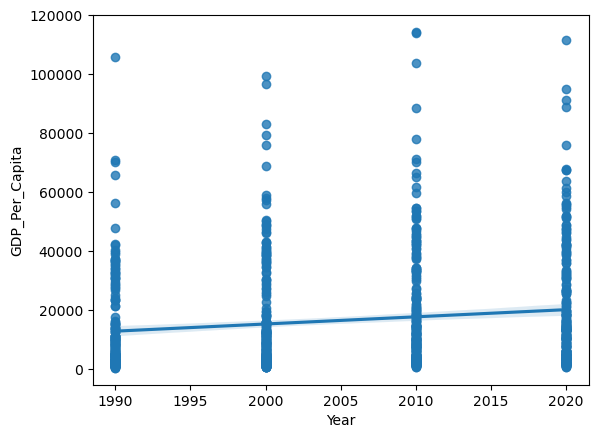

In [22]:
sns.regplot(x=gdp_decades["Year"],y=gdp_decades["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

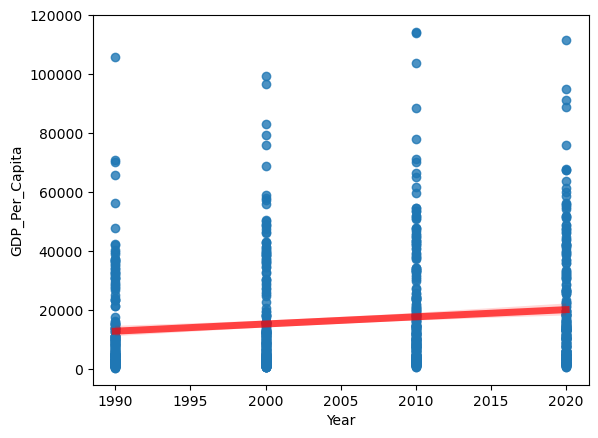

In [23]:
sns.regplot(x=gdp_decades["Year"],y=gdp_decades["GDP_Per_Capita"],line_kws={"color":"r","alpha":0.7,"lw":5})

Answer: GDP has slightly increased over time. The barplot is the worst visual because you only see the GDP value of that year. The box plot shows the median and quartiles increasing over time. The scatter plot with the regression line shows the increase in GDP per capita over time the best.

11. Which country was the first to have a GDP per capita greater than $100,000?

In [24]:
number11 = gdp_df.sort_values(["GDP_Per_Capita","Year"])
number11

,Country,Year,GDP_Per_Capita
4852,Mozambique,1992,436.376416
4854,Mozambique,1990,460.123697
4849,Mozambique,1995,465.833296
4851,Mozambique,1993,469.397817
4853,Mozambique,1991,473.612004
...,...,...,...
4183,"Macao SAR, China",2018,128437.322962
4190,"Macao SAR, China",2011,135365.387353
4189,"Macao SAR, China",2012,144891.341893
4187,"Macao SAR, China",2014,151616.402364


In [25]:
number11[(number11["GDP_Per_Capita"]>=99000) & (number11["GDP_Per_Capita"]<=105000)].sort_values("Year")

,Country,Year,GDP_Per_Capita
7301,United Arab Emirates,1991,101048.696239
7300,United Arab Emirates,1992,99106.791640
7297,United Arab Emirates,1995,99510.350680
7296,United Arab Emirates,1996,99602.617418
7295,United Arab Emirates,1997,100956.706467
4168,Luxembourg,2000,99301.526999
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098
4165,Luxembourg,2003,104743.000088
5756,Qatar,2010,103902.519310


Answer: UAE in 1991 with a GDP_Per_Capita of 101048.696239

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [26]:
gdp_df[gdp_df["Year"]==2020]["GDP_Per_Capita"].sort_values(ascending=False)

4148    111751.314751
6108     94910.101431
3279     91356.855054
5746     89019.069857
681      76117.804744
            ...      
5074      1214.546556
6273      1127.418534
1630      1044.071214
1217       847.765012
973        711.355263
Name: GDP_Per_Capita, Length: 242, dtype: float64

In [27]:
gdp_df[gdp_df["Year"]==2020]

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


In [28]:
gdp_df[gdp_df["Year"]==2020].sort_values("GDP_Per_Capita",ascending=False)
#This was how I found the answer. The rest of the lines for this problem are ways my classmates got the answer.

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751
6108,Singapore,2020,94910.101431
3279,Ireland,2020,91356.855054
5746,Qatar,2020,89019.069857
681,Bermuda,2020,76117.804744
...,...,...,...
5074,Niger,2020,1214.546556
6273,Somalia,2020,1127.418534
1630,Dem. Rep. Congo,2020,1044.071214
1217,Central African Republic,2020,847.765012


In [29]:
gdp_df[gdp_df["Year"]==2020]["GDP_Per_Capita"].max()

111751.3147513618

In [30]:
y2020=gdp_df[gdp_df["Year"]==2020]

y2020.loc[y2020['GDP_Per_Capita']==y2020['GDP_Per_Capita'].max()]

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [31]:
gdp_df[gdp_df["Year"]==2020].nlargest(1,"GDP_Per_Capita")

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [32]:
gdp_largest = gdp_df.loc[gdp_df["Year"]==2020]
gdp_largest.nlargest(1,"GDP_Per_Capita")

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


Answer: Luxembourg, 2020, GDP per capita of 111751.314751

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [33]:
year2020 = gdp_df[gdp_df["Year"]==2020]

year2020.loc[y2020['GDP_Per_Capita']==year2020['GDP_Per_Capita'].min()]

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


In [34]:
gdp_df[gdp_df["Year"]==2020].sort_values("GDP_Per_Capita",ascending=True)

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263
1217,Central African Republic,2020,847.765012
1630,Dem. Rep. Congo,2020,1044.071214
6273,Somalia,2020,1127.418534
5074,Niger,2020,1214.546556
...,...,...,...
681,Bermuda,2020,76117.804744
5746,Qatar,2020,89019.069857
3279,Ireland,2020,91356.855054
6108,Singapore,2020,94910.101431


Answer to first part: Burundi, 2020, GDP per capita of 711.355263

<Axes: xlabel='Year'>

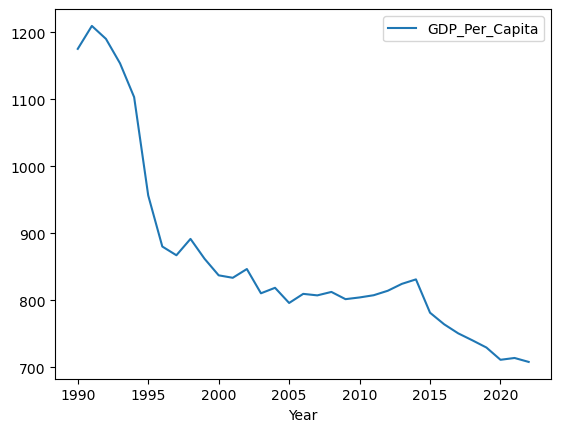

In [35]:
burundi= gdp_df[gdp_df["Country"]=="Burundi"]

burundi.plot(x="Year",y="GDP_Per_Capita",kind="line")

#Answer to second part: Burundi's GDP has decreased significantly over time.

In [36]:
#Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

avg_by_year = gdp_df.groupby("Year")["GDP_Per_Capita"].mean()
avg_by_year

Year
1990    12506.088374
1991    12498.814611
1992    12674.226587
1993    12734.335398
1994    12849.696532
1995    13213.998991
1996    13498.134248
1997    14105.576551
1998    14334.343554
1999    14674.453286
2000    15428.302468
2001    15580.359583
2002    15727.219555
2003    16116.364803
2004    16783.675744
2005    17256.780843
2006    18198.761336
2007    18808.039224
2008    18894.249449
2009    18242.372604
2010    18684.624440
2011    19111.399566
2012    19348.836855
2013    19405.179920
2014    19604.864244
2015    19754.804433
2016    20009.662767
2017    20406.564385
2018    20793.829730
2019    21057.505017
2020    19586.754446
2021    20711.570080
2022    21156.670869
Name: GDP_Per_Capita, dtype: float64

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [38]:
internet_df = pd.read_csv('../data/internet_use.csv')
internet_df



ParserError: Error tokenizing data. C error: Expected 4 fields in line 4675, saw 6


In [48]:
internet_df = pd.read_csv("../data/internet_use.csv", skiprows=0, nrows = 4672)
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4667,172,Population age 16+ using the Internet in the l...,NaN,NaN
4668,173,Population age 16+ using internet in the last ...,NaN,NaN
4669,174,"U.S. Census Bureau, Table 2. Reported Internet...",NaN,NaN
4670,175,Includes individuals 3 years and older,NaN,NaN


In [39]:
internet_df = pd.read_csv("../data/internet_use.csv", skiprows=0, nrows = 4495)
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
